In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [212]:
df = pd.read_csv('train_1.csv', parse_dates=['datetime'], index_col=0)
df_test = pd.read_csv('test.csv', parse_dates=['datetime'], index_col=0)

In [213]:
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

add_features(df)
add_features(df_test)

In [214]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [215]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [216]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [217]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

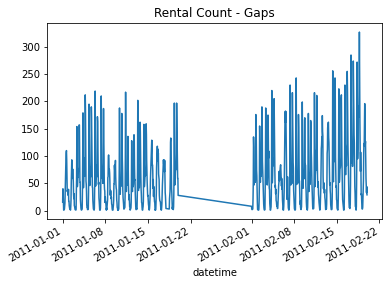

In [218]:
#predict missing data
plt.title('Rental Count - Gaps')
df['2011-01':'2011-02']['count'].plot()
plt.show()

In [219]:
group_hour = df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

In [220]:
group_hour

In [221]:
average_by_hour

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [222]:
group_year_month = df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()
average_year_month

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

In [223]:
average_year_month.index.levels[0]

Int64Index([2011, 2012], dtype='int64', name='year')

In [224]:
average_year_month[2011].index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

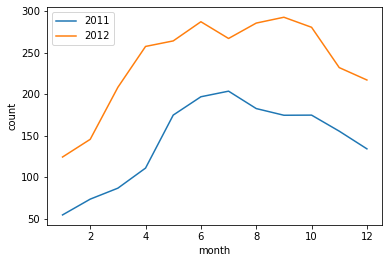

In [225]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index, average_year_month[year], label=year)

plt.legend()
plt.xlabel('month')
plt.ylabel('count')
plt.show()

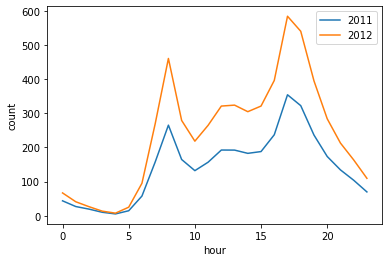

In [226]:
group_year_hour = df.groupby(['year', 'hour'])
average_year_hour = group_year_hour['count'].mean()
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index, average_year_hour[year], label=year)

plt.legend()
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

In [227]:
group_workingday_hour = df.groupby(['workingday', 'hour'])
average_workingday_hour = group_workingday_hour['count'].mean()                                    

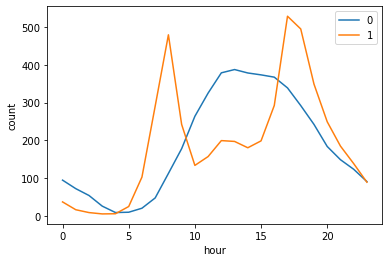

In [228]:
for workingday in average_workingday_hour.index.levels[0]:
    plt.plot(average_workingday_hour[workingday].index, average_workingday_hour[workingday], label=workingday)
    
plt.legend()
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

In [229]:
np.random.seed(777)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [230]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [231]:
rows, train, test

(10886, 7620, 3266)

In [232]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [233]:
df.iloc[:train].to_csv('bike_train.csv', index=False, header=False, columns=columns)
df.iloc[train:].to_csv('bike_validation.csv', index=False, header=False, columns=columns)
df_test.to_csv('bike_test.csv',index=True,index_label='datetime')

In [234]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [235]:
with open('bike_train_column_list.txt', 'w') as f:
    f.write(','.join(columns))

In [236]:
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [237]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [238]:
columns = ''
with open(column_list_file, 'r') as f:
    columns = f.read().split(',')

In [239]:
df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [240]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,5,2,0,1,1,14.76,17.425,53,11.0014,2012,4,3,1,2
1,152,2,0,1,2,21.32,25.000,83,8.9981,2011,5,13,4,20
2,436,3,0,1,1,27.06,31.060,65,8.9981,2012,8,13,0,7
3,61,1,0,0,2,9.84,12.120,87,8.9981,2012,2,5,6,0
4,214,3,0,1,1,30.34,33.335,48,11.0014,2012,7,12,3,10


In [241]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:,0].ravel()

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel() #1차원으로 평평하게

In [242]:
regressor = xgb.XGBRegressor(max_depth=5, n_estimators=150)
regressor

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [243]:
regressor.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:199.98224	validation_1-rmse:199.22589
[1]	validation_0-rmse:157.99072	validation_1-rmse:157.24550
[2]	validation_0-rmse:130.61333	validation_1-rmse:130.72440
[3]	validation_0-rmse:111.37484	validation_1-rmse:112.07683
[4]	validation_0-rmse:97.40998	validation_1-rmse:98.28271
[5]	validation_0-rmse:81.99503	validation_1-rmse:82.65683
[6]	validation_0-rmse:76.58426	validation_1-rmse:77.56569
[7]	validation_0-rmse:70.59390	validation_1-rmse:71.46994
[8]	validation_0-rmse:64.19226	validation_1-rmse:64.71619
[9]	validation_0-rmse:62.39740	validation_1-rmse:63.31128
[10]	validation_0-rmse:59.48794	validation_1-rmse:60.65888
[11]	validation_0-rmse:58.55631	validation_1-rmse:59.95821
[12]	validation_0-rmse:54.60616	validation_1-rmse:56.02478
[13]	validation_0-rmse:53.52607	validation_1-rmse:55.14259
[14]	validation_0-rmse:52.52961	validation_1-rmse:54.14738
[15]	validation_0-rmse:51.44638	validation_1-rmse:53.23901
[16]	validation_0-rmse:50.70322	validation_1-rmse:52.72135

[139]	validation_0-rmse:26.25175	validation_1-rmse:38.26783
[140]	validation_0-rmse:26.12103	validation_1-rmse:38.29348
[141]	validation_0-rmse:26.05441	validation_1-rmse:38.25799
[142]	validation_0-rmse:25.92874	validation_1-rmse:38.22414
[143]	validation_0-rmse:25.85137	validation_1-rmse:38.22503
[144]	validation_0-rmse:25.74016	validation_1-rmse:38.19533
[145]	validation_0-rmse:25.70588	validation_1-rmse:38.19408
[146]	validation_0-rmse:25.59653	validation_1-rmse:38.15821
[147]	validation_0-rmse:25.55899	validation_1-rmse:38.16284
[148]	validation_0-rmse:25.41699	validation_1-rmse:38.10233
[149]	validation_0-rmse:25.34434	validation_1-rmse:38.08239


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [244]:
eval_result = regressor.evals_result()

In [245]:
training_rounds = range(len(eval_result['validation_0']['rmse']))
print(training_rounds)

range(0, 150)


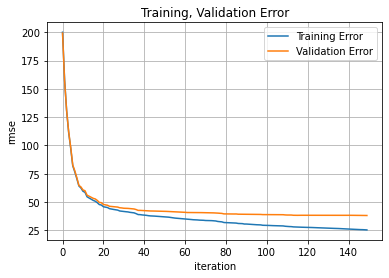

In [246]:
plt.plot(training_rounds, eval_result['validation_0']['rmse'], label='Training Error')
plt.plot(training_rounds, eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.legend()
plt.title('Training, Validation Error')
plt.show()

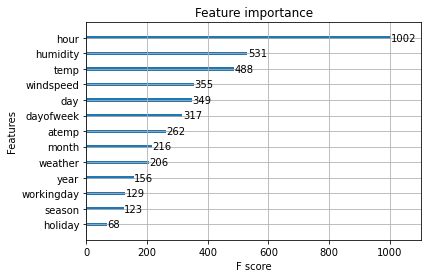

In [247]:
xgb.plot_importance(regressor)
plt.show()

In [248]:
df = pd.read_csv(validation_file, names=columns)
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,274,3,0,1,1,31.16,33.335,33,8.9981,2011,7,14,3,16
1,212,3,0,1,1,22.96,26.515,64,6.0032,2012,9,12,2,22
2,15,4,0,1,1,22.96,26.515,64,16.9979,2011,11,15,1,2
3,814,3,0,1,2,31.16,35.605,62,11.0014,2012,8,7,1,18
4,479,3,0,1,1,32.80,37.880,55,19.0012,2012,8,1,2,16


In [249]:
df.shape

(3266, 14)

In [250]:
X_test = df.iloc[:, 1:]
X_test[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,3,0,1,1,31.16,33.335,33,8.9981,2011,7,14,3,16
1,3,0,1,1,22.96,26.515,64,6.0032,2012,9,12,2,22
2,4,0,1,1,22.96,26.515,64,16.9979,2011,11,15,1,2
3,3,0,1,2,31.16,35.605,62,11.0014,2012,8,7,1,18
4,3,0,1,1,32.80,37.880,55,19.0012,2012,8,1,2,16


In [251]:
result = regressor.predict(X_test)
result[:5]

array([303.0059   , 233.87032  ,   5.2252865, 799.70776  , 425.13126  ],
      dtype=float32)

In [252]:
df['count_predicted'] = result
df['count_predicted'].describe()

count    3266.000000
mean      191.172791
std       178.749527
min       -84.342354
25%        40.857791
50%       151.171753
75%       280.622330
max       942.874084
Name: count_predicted, dtype: float64

In [253]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
48,24,1,0,0,2,12.30,16.665,52,0.0000,2012,1,8,6,7,-44.331951
54,1,1,0,1,3,21.32,25.000,72,19.9995,2012,3,13,1,2,-1.775359
60,73,1,0,1,3,13.12,16.665,81,7.0015,2012,1,11,2,14,-13.767013
81,3,3,0,1,2,24.60,28.030,83,0.0000,2011,8,15,0,2,-5.678977
85,9,2,0,1,3,21.32,25.000,94,19.9995,2011,5,18,2,3,-6.404266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,5,2,0,1,1,18.04,21.970,24,12.9980,2012,4,9,0,4,-7.889182
3138,1,2,0,1,1,13.12,16.665,66,6.0032,2012,4,3,1,4,-4.085179
3160,4,1,1,0,3,6.56,6.820,86,19.0012,2011,1,17,0,23,-16.965597
3227,3,1,0,0,2,18.86,22.725,94,12.9980,2011,1,2,6,4,-21.537102


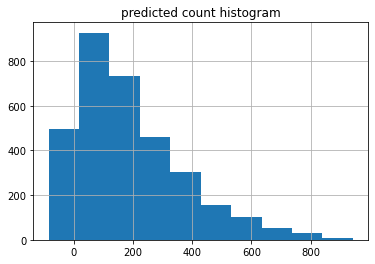

In [254]:
df['count_predicted'].hist()
plt.title('predicted count histogram')
plt.show()

In [255]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

df['count_predicted'] = df['count_predicted'].map(adjust_count)
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [256]:
# df['count'] = df['count'].map(np.expm1)
# df['count_predicted'] = df['count_predicted'].map(np.expm1)

In [257]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,274,3,0,1,1,31.16,33.335,33,8.9981,2011,7,14,3,16,303.005890
1,212,3,0,1,1,22.96,26.515,64,6.0032,2012,9,12,2,22,233.870316
2,15,4,0,1,1,22.96,26.515,64,16.9979,2011,11,15,1,2,5.225286
3,814,3,0,1,2,31.16,35.605,62,11.0014,2012,8,7,1,18,799.707764
4,479,3,0,1,1,32.80,37.880,55,19.0012,2012,8,1,2,16,425.131256


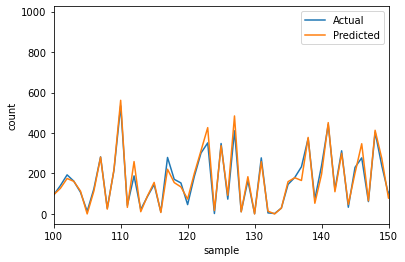

In [258]:
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'], label='Predicted')
plt.xlabel('sample')
plt.ylabel('count')
plt.xlim([100,150])
plt.legend()
plt.show()

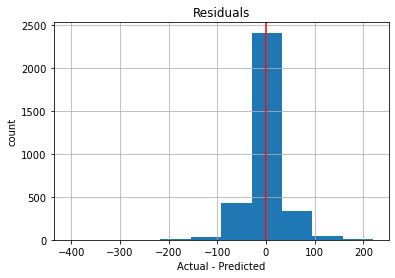

In [259]:
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('count')
plt.title('Residuals')
plt.axvline(color='r')
plt.show()

In [260]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.49
 Over  Estimation: 0.51


In [261]:
print("RMSE: {0:0.2f}".format(mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 37.82


In [262]:
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

print('RMSLE')
print(compute_rmsle(100,50),
      compute_rmsle(1000,500),
      compute_rmsle(10000,5000))

print('RMSLE')
print(compute_rmsle(100,25),
      compute_rmsle(1000,250),
      compute_rmsle(10000,2500))

RMSLE
0.683294884116934 0.6921486782303559 0.6930471955576127
RMSLE
1.3570239788197775 1.383301840183437 1.3859944360988976


In [263]:
print('RMSE')
print(mean_squared_error([100],[50])**.5,
      mean_squared_error([1000],[500])**.5, 
      mean_squared_error([10000],[5000])**.5)

print('RMSE')
print(mean_squared_error([100],[25])**.5,
      mean_squared_error([1000],[250])**.5, 
      mean_squared_error([10000],[2500])**.5)

print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSE
50.0 500.0 5000.0
RMSE
75.0 750.0 7500.0
RMSLE: 0.5648196062530568


In [264]:
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [265]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [266]:
X_test =  df_test.iloc[:,1:]

In [267]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [268]:
result = regressor.predict(X_test)
result[:5]

array([12.240176 , -2.625149 , -5.2782803, -2.151815 , -2.151815 ],
      dtype=float32)

In [269]:
df_test["count"] = result
df_test[df_test["count"] < 0]
df_test[['datetime','count']].to_csv('predicted_count_log.csv',index=False)

In [270]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,12.240176
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-2.625149
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-5.278280
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-2.151815
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-2.151815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,0,19,277.591614
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,0,20,173.304749
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,0,21,154.253906
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,0,22,75.013542
